In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
%matplotlib inline

In [54]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# MLPによる手書き数字の分類

In [55]:
transform = transforms.Compose([
    transforms.ToTensor()
])
train_dataset = datasets.MNIST(root=".\data", train=True, download=True, transform=transform)

In [56]:
num_batches = 100

In [57]:
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

In [58]:
train_iter = iter(train_dataloader)

In [59]:
imgs, labels = next(train_iter)

In [60]:
imgs.size()

torch.Size([100, 1, 28, 28])

<Axes: >

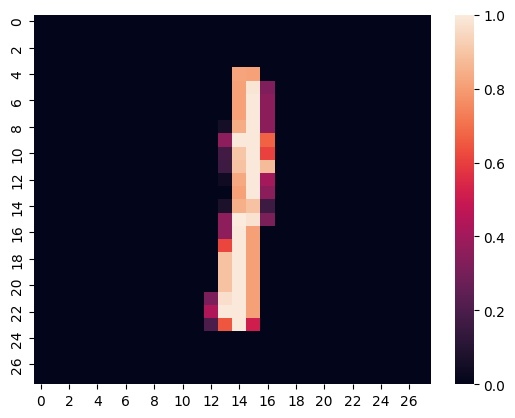

In [61]:
img_permute = imgs[0].permute(1, 2, 0) # チャネルを最後に持ってくる
sns.heatmap(img_permute.numpy()[:, :, 0]) # ２次元配列に変換

In [62]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.classifier = nn.Sequential(
        nn.Linear(28 * 28, 400),
        nn.ReLU(inplace=True),
        nn.Linear(400, 200),
        nn.ReLU(inplace=True),
        nn.Linear(200, 100),
        nn.ReLU(inplace=True),
        nn.Linear(100, 10) # 10クラス分類なのでアウトプットは10
    )
  def forward(self, x):
    out = self.classifier(x)
    return out

* バッチ学習：学習データを一気に学習
* ミニバッチ学習: いくつかのバッチに分けて学習

In [63]:
model = MLP()
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [65]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
  running_loss = 0.0
  running_acc = 0.0
  for imgs, labels in train_dataloader:
    imgs = imgs.view(num_batches, -1)
    imgs = imgs.to(device)
    labels = labels.to(device)
    optimizer.zero_grad() # 勾配を初期化
    output = model(imgs) # 出力
    loss = criterion(output, labels) # 損失関数を計算
    running_loss += loss.item()
    pred = torch.argmax(output, dim=1) # 出力確率が１番高い数字に分類
    running_acc += torch.mean(pred.eq(labels).float())
    loss.backward()
    optimizer.step()
  running_loss /= len(train_dataloader) # バッチごとの平均損失を計算
  running_acc /= len(train_dataloader) # バッチごとの平均精度を計算
  losses.append(running_loss)
  accs.append(running_acc)
  print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.3067548516392708, acc: 0.9100173115730286
epoch: 1, loss: 0.10749929635164639, acc: 0.9668160080909729
epoch: 2, loss: 0.07033159589394927, acc: 0.9778483510017395
epoch: 3, loss: 0.050775292747033136, acc: 0.9831324219703674
epoch: 4, loss: 0.03919705703505315, acc: 0.9870822429656982
epoch: 5, loss: 0.029858454519611163, acc: 0.9899486303329468
epoch: 6, loss: 0.024222695530503793, acc: 0.9923321008682251
epoch: 7, loss: 0.021248430343694055, acc: 0.9929816722869873
epoch: 8, loss: 0.019885070716203095, acc: 0.993332028388977
epoch: 9, loss: 0.017505844754826586, acc: 0.9941819310188293
epoch: 10, loss: 0.015564408060902982, acc: 0.9951151609420776
epoch: 11, loss: 0.013273321389776053, acc: 0.9954152703285217
epoch: 12, loss: 0.01461706504830848, acc: 0.9955319166183472
epoch: 13, loss: 0.010784631570907853, acc: 0.9966322183609009
epoch: 14, loss: 0.010493802548216991, acc: 0.9966157078742981


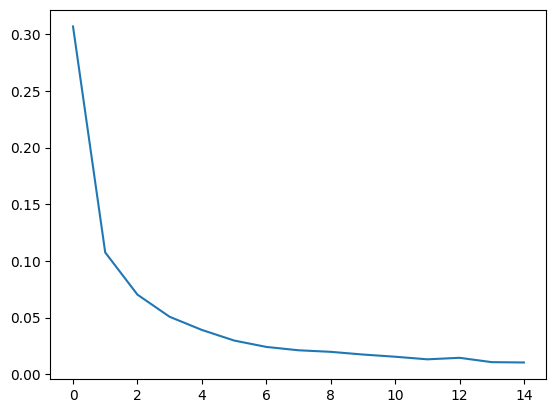

In [66]:
plt.plot(losses)

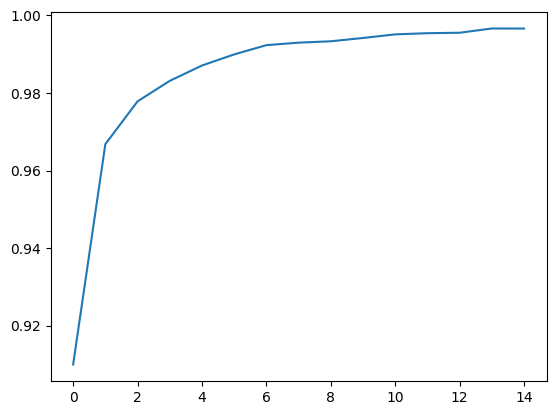

In [67]:
accs_numpy = []
for acc in accs:
  accs_numpy.append(acc.cpu().numpy())
plt.plot(accs_numpy)

In [68]:
train_iter = iter(train_dataloader)
imgs, labels = next(train_iter)
labels

tensor([0, 3, 1, 8, 8, 2, 2, 0, 0, 9, 4, 4, 3, 4, 8, 1, 4, 6, 0, 1, 5, 6, 7, 6,
        6, 1, 9, 2, 4, 4, 0, 0, 5, 0, 9, 5, 9, 7, 8, 8, 4, 9, 7, 9, 1, 2, 5, 0,
        1, 1, 8, 2, 6, 9, 5, 3, 5, 0, 1, 6, 2, 7, 8, 4, 5, 6, 3, 9, 7, 5, 9, 5,
        0, 1, 0, 8, 4, 9, 2, 0, 2, 8, 8, 3, 7, 5, 9, 2, 6, 5, 7, 2, 9, 6, 2, 3,
        1, 7, 3, 4])

In [69]:
imgs_gpu = imgs.view(100, -1).to(device)
output = model(imgs_gpu)

In [70]:
pred = torch.argmax(output, dim=1)

In [71]:
pred

tensor([0, 3, 1, 8, 8, 2, 2, 0, 0, 9, 4, 4, 3, 2, 8, 1, 4, 6, 0, 1, 5, 6, 7, 6,
        6, 1, 9, 2, 4, 4, 0, 0, 5, 0, 9, 5, 9, 7, 8, 8, 4, 9, 7, 9, 1, 2, 5, 0,
        1, 1, 8, 2, 6, 9, 5, 3, 5, 0, 1, 6, 2, 7, 8, 4, 5, 6, 3, 9, 7, 5, 9, 5,
        0, 1, 0, 8, 4, 9, 2, 0, 2, 8, 8, 3, 7, 5, 9, 2, 6, 5, 7, 2, 9, 6, 2, 3,
        1, 7, 3, 4], device='cuda:0')